In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind

## Import and subset data

In [2]:
# import metadata
meta = pd.read_csv('../T1_SMDS_metadata_ms.txt', sep='\t', index_col=0)
# pull out only PMA treated samples
pma = meta[meta['processing']=='PMA']
pma.shape

(88, 27)

## Plot Figure 3A

[(10, 1000000)]

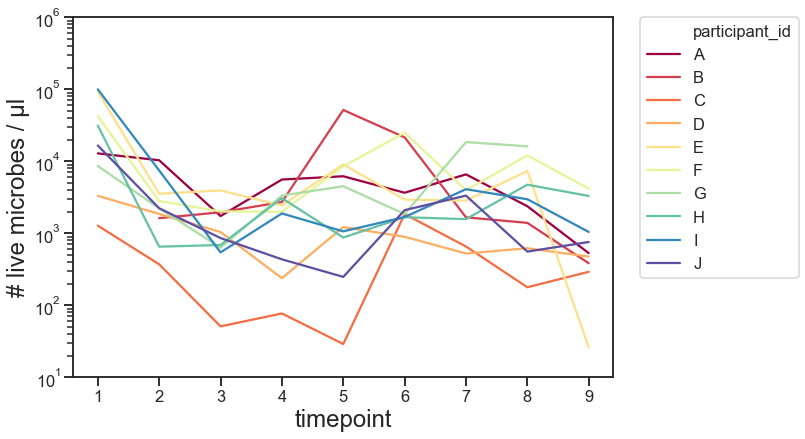

In [3]:
sns.set_style('ticks') 
sns.set_context("talk")
fig = plt.figure() # create figure
rect = 0,0,1,1 # create rectangle for the new axis
log_ax = fig.add_axes(rect) # create a new axis 
log_ax.set_yscale("log") # set the y-axis to log scale
fig.set_size_inches(7.5,5) 
# match colors to PCoA
colors = ('#9e0142', '#d53e4f', '#f46d43', '#fdae61', '#fee08b', '#e6f598', '#abdda4', '#66c2a5', '#3288bd', '#5e4fa2')
# plot data!
ax = sns.lineplot(y='FC_avg_cells_per_ul', x='timepoint', hue='participant_id', data=pma, palette=colors)
ax.set_yscale("log") 
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# adjust legends
log_ax.set_ylabel('# live microbes / µl', fontsize=24)#, fontweight='bold')
log_ax.set_xlabel('timepoint', fontsize=24)#, fontweight='bold')
log_ax.set(ylim=(10, 1000000))

## Plot Figure 3B 

In [4]:
# drop out subject B who did not provide an initial timepoint (therefore cannot normalize to T1)
pma9 = pma[(pma['participant_id']!='B')]

In [5]:
# define function to divide avg cell concentration by initial timepoint
def relcell(row, lookup_table):
    if row.timepoint == 1:
        return 1
    else:
        baseline = pma9[(pma9.participant_id == row.participant_id) &
                           (pma9.timepoint == 1)].FC_avg_cells_per_ul
        baseline = baseline.tolist().pop()
        return row.FC_avg_cells_per_ul / baseline
    
pma9['percent_cellsconc_t1'] = pma9.apply(relcell, axis=1, args=(pma9,))

/Users/lisamarotz/miniconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


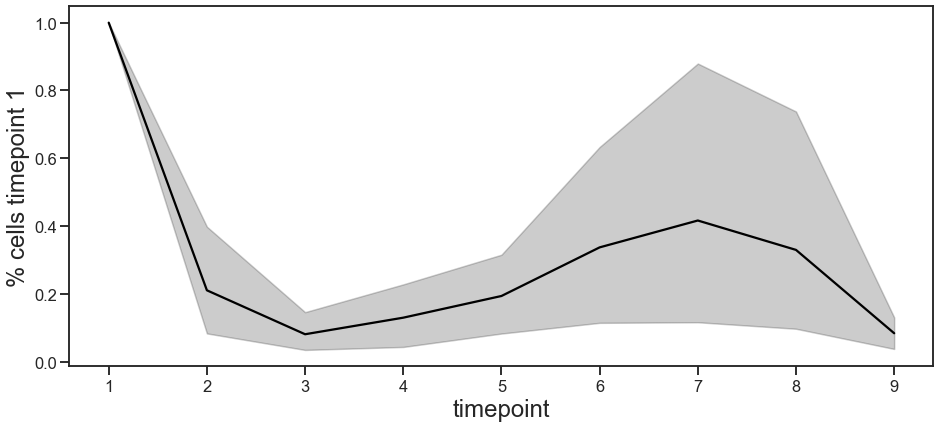

In [6]:
sns.set_style('ticks')
sns.set_context("talk")
fig = plt.figure() # create figure
rect = 0,0,1,1 # create rectangle for the new axis
log_ax = fig.add_axes(rect) # create a new axis 
fig.set_size_inches(12,5)
# plot data!
ax = sns.lineplot(y='percent_cellsconc_t1', x='timepoint', data=pma9, color='black')
# adjust axis labels
log_ax.set_ylabel('% cells timepoint 1', fontsize=24)#, fontweight='bold')
log_ax.set_xlabel('timepoint', fontsize=24)#, fontweight='bold')
# save figure
fig.savefig('/Users/lisamarotz/Dropbox/Lisa_stuff/Thesis/publications/Saliva_quant/Figures/Figure3_dynamics/Figure3B_cellconc_norm.pdf',
            bbox_inches='tight')

In [7]:
fig.savefig('../../figures/microbial_load_over_time.png',
            bbox_inches='tight', dpi=500)

## Compare salivary flow rate early in day versus later

In [8]:
# create function to categorize time points into early and late
def f(row):
    if (row['timepoint']==1)|(row['timepoint']==2):
        val = "early"
    else:
        val = "late"
    return val

meta['timepoint_cat'] = meta.apply(f, axis=1)

In [9]:
# remove duplicates saliva sample IDs
met = meta.drop_duplicates(subset='saliva_sample_ID')
met.shape

(88, 28)

In [10]:
# subset out samples collected in the morning versus later in the day
early = met[(met['timepoint_cat']=='early')]
late = met[(met['timepoint_cat']=='late')]

In [11]:
# calculate p-value of independent t-test
stats.ttest_ind(early['saliva_flow_rate_mL_per_min'],late['saliva_flow_rate_mL_per_min'])

Ttest_indResult(statistic=-2.469824960291594, pvalue=0.015493701263980857)